In [3]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=10d70940d3fe92dbf5bb03778fd524be21e8f623a04c15ac01ca49f45c24653d
  Stored in directory: c:\users\bleec\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

546

In [10]:
# empty lists to hold data
city_names = []
cloudiness = []
country_list = []
dates = []
humidity_list = []
lat_list = []
lng_list = []
temp_max_list = []
windspeeds = []

# counter variable to keep track of interations
counter=0

# variable set of iterations
counter_total = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# display info
print("Beginning Data Retrieval ")
print("-----------------------------")

# urls
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# for loop to loop through the data and append the attributes to the given lists
for index, city in enumerate(cities, start = 1):
    
    # try to manage KeyError
    try:  
        response = requests.get(query_url + city).json()
        
        # city names list
        city_names.append(response["name"])

        # cloudiness data list
        cloudiness.append(response["clouds"]["all"])

        # country list
        country_list.append(response["sys"]["country"])

        # dates list
        dates.append(response["dt"])

        # humidity list
        humidity_list.append(response["main"]["humidity"])

        # latitude list
        lat_list.append(response["coord"]["lat"])

        # longitude list
        lng_list.append(response["coord"]["lon"])

        # maximum temperature list
        temp_max_list.append(response["main"]["temp_max"])

        # wind speeds list
        windspeeds.append(response["wind"]["speed"])

        # counter for iterations
        if counter > 49:
            counter = 0
            counter_total += 1
        else:
            counter += 1
            
        print(f"Processing Record {counter} of Set {counter_total} | {city}")
        
        # add 2 second delay between each api call
        time.sleep(3)
        
    except(KeyError):
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | murgab
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | cherskiy
Processing Record 24 of Set 1 | nikolskoye
Processing Record 25 of Set 1 | mount isa
Processing Record 26 of Set 1 | puerto escondido
Processing Record 27 of Set 1 | saint-philippe
Processing Record 28 of Set 1 | mataura
Processing Record 29 of Set 1 | arraial do cabo
Processing Record 30 of Set 1 | iqaluit
Processing Record 31 of Set 1 | kapaa
Processing Record 32 of Set 1 | kasongo-lunda
Processing Record 33 of Set 1 | cape town
Processing Record 34 of Set 1 | okahandja
Processing Record 35 of Set 1 | puerto ayora
Processing Record 36 of Set 1 | hofn
Processing Record 37 of Set 1 | dikson
Processing Record 38 of Set 1 | hithadhoo
Processing Record 39 of Set 1 | neijiang
Processing Recor

Processing Record 46 of Set 4 | la trinitaria
Processing Record 47 of Set 4 | kijang
Processing Record 48 of Set 4 | maridi
Processing Record 49 of Set 4 | kamaishi
Processing Record 50 of Set 4 | sorrento
Processing Record 0 of Set 5 | kahului
Processing Record 1 of Set 5 | enshi
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | maniitsoq
Processing Record 4 of Set 5 | tuktoyaktuk
Processing Record 5 of Set 5 | tilichiki
Processing Record 6 of Set 5 | japura
Processing Record 7 of Set 5 | akranes
Processing Record 8 of Set 5 | vaini
Processing Record 9 of Set 5 | hami
Processing Record 10 of Set 5 | ballina
Processing Record 11 of Set 5 | matara
Processing Record 12 of Set 5 | shalyhyne
Processing Record 13 of Set 5 | byron bay
Processing Record 14 of Set 5 | mar del plata
Processing Record 15 of Set 5 | port huron
Processing Record 16 of Set 5 | sitka
Processing Record 17 of Set 5 | mabaruma
Processing Record 18 of Set 5 | svetlyy
Processing Record 19 of Set 5 | brae

Processing Record 36 of Set 8 | halifax
Processing Record 37 of Set 8 | azle
Processing Record 38 of Set 8 | san roque
Processing Record 39 of Set 8 | wervik
Processing Record 40 of Set 8 | dorado
Processing Record 41 of Set 8 | kumbo
Processing Record 42 of Set 8 | saint-denis
City not found. Skipping...
Processing Record 43 of Set 8 | kyren
Processing Record 44 of Set 8 | oktyabrskoye
Processing Record 45 of Set 8 | koungou
Processing Record 46 of Set 8 | khani
Processing Record 47 of Set 8 | kamenka
Processing Record 48 of Set 8 | saint-augustin
City not found. Skipping...
Processing Record 49 of Set 8 | tual
Processing Record 50 of Set 8 | russkiy kameshkir
Processing Record 0 of Set 9 | bandarbeyla
Processing Record 1 of Set 9 | sorkjosen
Processing Record 2 of Set 9 | seoul
Processing Record 3 of Set 9 | yulara
Processing Record 4 of Set 9 | pombas
Processing Record 5 of Set 9 | oriximina
Processing Record 6 of Set 9 | esperance
Processing Record 7 of Set 9 | mattru
Processing Re

In [ ]:
len(cities)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Data frame for mined data
weather_df = pd.DataFrame({ 
                "City" : city_names,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : temp_max_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness,
                "Wind Speed" : windspeeds,
                "Country" : country_list,
                "Date" : dates
})

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,69.80,88,100,3.36,CK,1603823838
1,Provideniya,64.38,-173.30,28.98,96,97,4.52,RU,1603823840
2,Murgab,37.50,61.97,55.40,50,0,9.17,TM,1603823842
3,Geraldton,-28.77,114.60,60.80,77,40,8.05,AU,1603823844
4,Busselton,-33.65,115.33,60.01,74,66,9.78,AU,1603823846


In [16]:
weather_df.count()
#weather_df.to_csv("../output_data/weather_df.csv", index=False, header=True)

City          516
Lat           516
Lng           516
Max Temp      516
Humidity      516
Cloudiness    516
Wind Speed    516
Country       516
Date          516
dtype: int64

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [17]:
# statistical analysis of mined data
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,5.160000e+02
mean,19.645291,14.369457,59.498043,73.054264,55.220930,7.665310,1.603825e+09
std,33.183911,91.944445,21.916684,20.659255,40.260096,5.541824,4.858751e+02
min,-54.800000,-175.200000,-10.260000,10.000000,0.000000,0.430000,1.603824e+09
25%,-6.470000,-65.295000,43.120000,66.000000,8.000000,3.580000,1.603824e+09
50%,21.375000,15.885000,64.400000,78.000000,75.000000,6.520000,1.603825e+09
75%,48.575000,96.397500,77.647500,88.000000,94.000000,10.185000,1.603825e+09
max,78.220000,179.320000,93.380000,100.000000,100.000000,55.990000,1.603825e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# SKIPPING DUE TO NO CITIES WITH HUMIDITY > 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

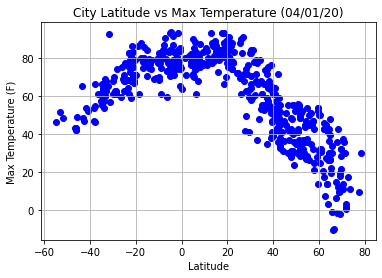

<Figure size 432x288 with 0 Axes>

In [22]:
# Scatter plot of latitide vs max temperature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor="blue")
plt.title("City Latitude vs Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

plt.savefig("../Images/City_Latitude_vs_Max_Temp.png")

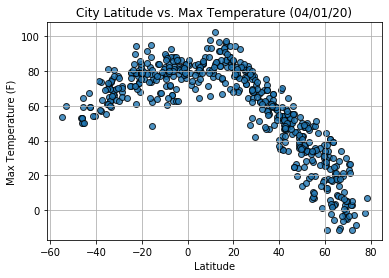

## Latitude vs. Humidity Plot

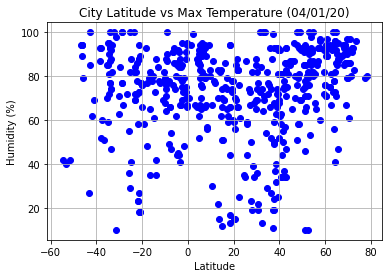

<Figure size 432x288 with 0 Axes>

In [23]:
# Scatter plot of latitide vs humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor="blue")
plt.title("City Latitude vs Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

plt.savefig("../Images/City_Latitude_vs_Humidity.png")

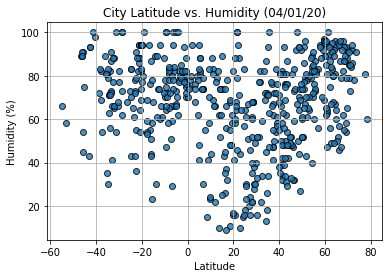

## Latitude vs. Cloudiness Plot

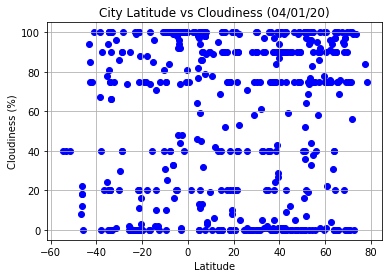

<Figure size 432x288 with 0 Axes>

In [24]:
# Scatter plot of latitide vs cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor="blue")
plt.title("City Latitude vs Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

plt.savefig("../Images/City_Latitude_vs_Cloudiness.png")

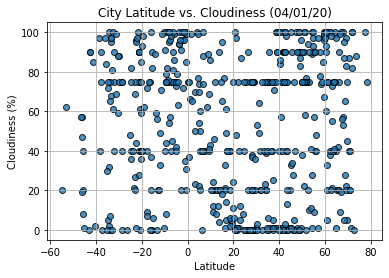

## Latitude vs. Wind Speed Plot

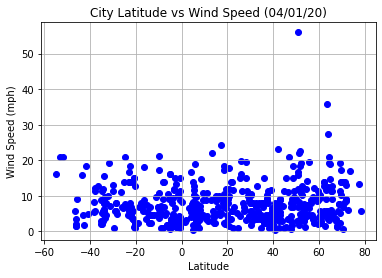

<Figure size 432x288 with 0 Axes>

In [25]:
# Scatter plot of latitide vs wind speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor="blue")
plt.title("City Latitude vs Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

plt.savefig("../Images/City_Latitude_vs_Wind_Speed.png")

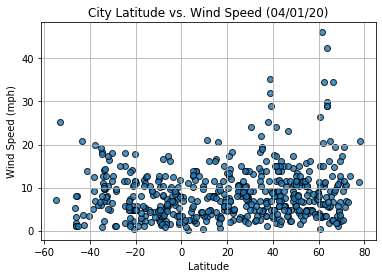

## Linear Regression

In [26]:
# establish northern and southern hemisphere 
northern_h = weather_df.loc[weather_df["Lat"] > 0]
southern_h = weather_df.loc[weather_df["Lat"] < 0]

#northern_h
southern_h

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,69.80,88,100,3.36,CK,1603823838
3,Geraldton,-28.77,114.60,60.80,77,40,8.05,AU,1603823844
4,Busselton,-33.65,115.33,60.01,74,66,9.78,AU,1603823846
7,Mount Isa,-20.73,139.50,68.00,18,0,14.99,AU,1603823808
9,Saint-Philippe,-21.36,55.77,75.20,73,20,3.36,RE,1603823857
...,...,...,...,...,...,...,...,...,...
503,Cruzeiro do Sul,-29.51,-51.99,70.00,84,30,1.01,BR,1603825451
507,Ipixuna,-1.76,-48.80,84.20,79,40,10.29,BR,1603825463
509,Tolaga Bay,-38.37,178.30,53.51,87,100,8.41,NZ,1603825470
510,Sydney,-33.87,151.21,57.20,87,75,8.05,AU,1603825473


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.7597944606683241


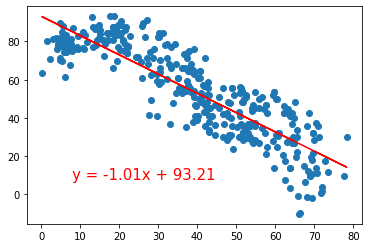

In [29]:
# x-axis variable to hold Northern Hemisphere Latitude to use later
x_lat_n = northern_h["Lat"]

# y-axis variable for Northern Hemisphere Max Temp
y_temp_n = northern_h["Max Temp"]

# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_n, y_temp_n)

#print r-value
print(f"The r-value is : {rvalue**2}")

# regression values
regress_values = x_lat_n * slope + intercept

# regression line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,8),fontsize=15,color="red")
plt.scatter(x_lat_n, y_temp_n)
plt.plot(x_lat_n,regress_values,"r-")
plt.savefig("../Images/Northern_Hemisphere_Max_Temp_Regression.png")

The r-value is: 0.46937863826630627


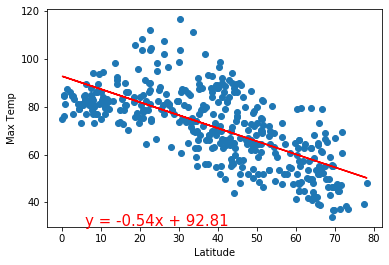

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.6030782992080427


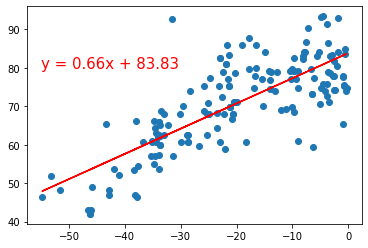

In [30]:
# x-axis variable to hold Southern Hemisphere Latitude to use later
x_lat_s = southern_h["Lat"]

# y-axis variable for Southern Hemisphere Max Temp
y_temp_s = southern_h["Max Temp"]

# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_s, y_temp_s)

#print r-value
print(f"The r-value is : {rvalue**2}")

# regression values
regress_values = x_lat_s * slope + intercept

# regression line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.scatter(x_lat_s, y_temp_s)
plt.plot(x_lat_s,regress_values,"r-")
plt.savefig("../Images/Southern_Hemisphere_Max_Temp_Regression.png")

The r-value is: 0.6082708688906918


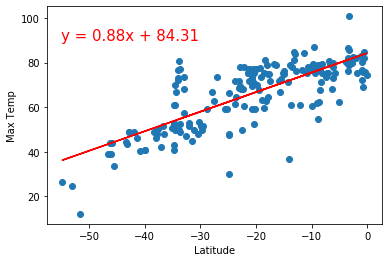

The r-value is : 0.053660308891296894


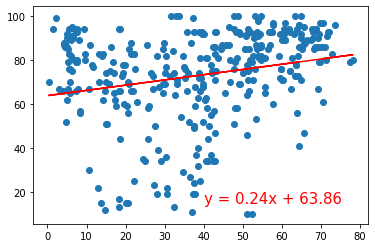

In [31]:
# y-axis variable for Northern Hemisphere Humidity
y_hum_n = northern_h["Humidity"]

# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_n, y_hum_n)

#print r-value
print(f"The r-value is : {rvalue**2}")

# regression values
regress_values = x_lat_n * slope + intercept

# regression line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.scatter(x_lat_n, y_hum_n)
plt.plot(x_lat_n,regress_values,"r-")
plt.savefig("../Images/Northern_Hemisphere_Humidity_Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


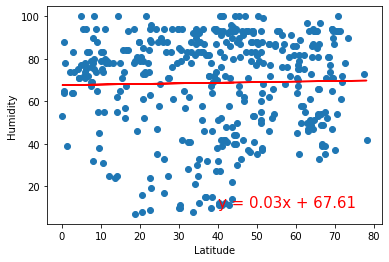

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 8.889510402285848e-06


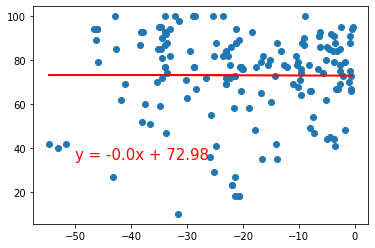

In [34]:
# y-axis variable for Southern Hemisphere Humidity
y_hum_s = southern_h["Humidity"]

# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_s, y_hum_s)

#print r-value
print(f"The r-value is : {rvalue**2}")

# regression values
regress_values = x_lat_s * slope + intercept

# regression line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.scatter(x_lat_s, y_hum_s)
plt.plot(x_lat_s,regress_values,"r-")
plt.savefig("../Images/Southern_Hemisphere_Humidity_Regression.png")

The r-value is: 0.014985174297345524


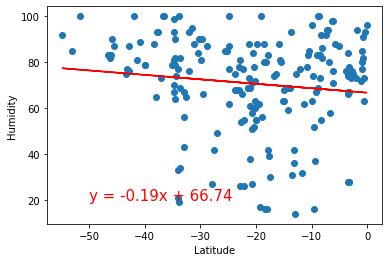

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.0027432606031722526


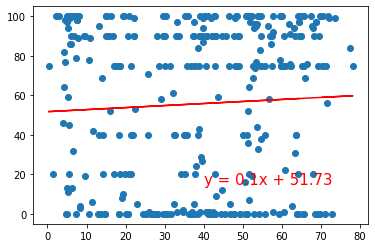

In [33]:
# y-axis variable for Northern Hemisphere Cloudiness
y_cld_n = northern_h["Cloudiness"]

# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_n, y_cld_n)

#print r-value
print(f"The r-value is : {rvalue**2}")

# regression values
regress_values = x_lat_n * slope + intercept

# regression line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.scatter(x_lat_n, y_cld_n)
plt.plot(x_lat_n,regress_values,"r-")
plt.savefig("../Images/Northern_Hemisphere_Cloudiness_Regression.png")

The r-value is: 0.0020898727664228514


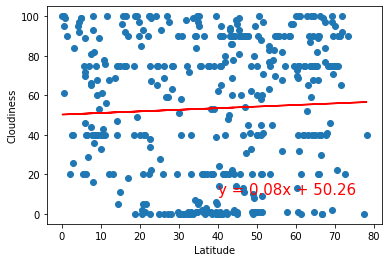

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.06421709862634647


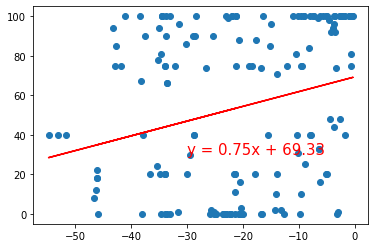

In [35]:
# y-axis variable for Southern Hemisphere Cloudiness
y_cld_s = southern_h["Cloudiness"]

# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_s, y_cld_s)

#print r-value
print(f"The r-value is : {rvalue**2}")

# regression values
regress_values = x_lat_s * slope + intercept

# regression line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.scatter(x_lat_s, y_cld_s)
plt.plot(x_lat_s,regress_values,"r-")
plt.savefig("../Images/Southern_Hemisphere_Cloudiness_Regression.png")

The r-value is: 0.0035263772085582894


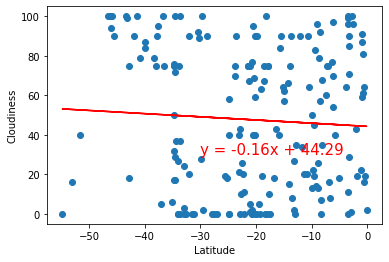

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.015582228945846311


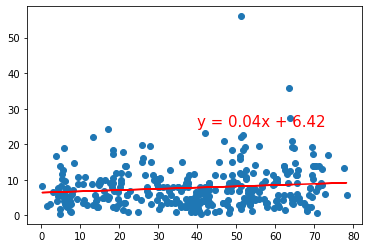

In [36]:
# y-axis variable for Northern Hemisphere Wind Speed
y_wnd_n = northern_h["Wind Speed"]

# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_n, y_wnd_n)

#print r-value
print(f"The r-value is : {rvalue**2}")

# regression values
regress_values = x_lat_n * slope + intercept

# regression line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.scatter(x_lat_n, y_wnd_n)
plt.plot(x_lat_n,regress_values,"r-")
plt.savefig("../Images/Northern_Hemisphere_Wind_Speed_Regression.png")

The r-value is: 0.04019723576144484


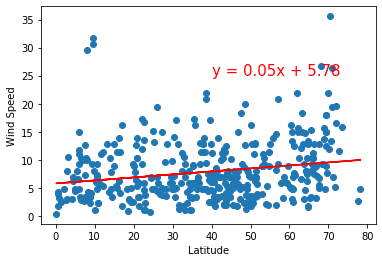

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.03322563657522261


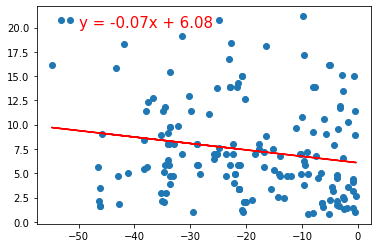

In [37]:
# y-axis variable for Southern Hemisphere Wind Speed
y_wnd_s = southern_h["Wind Speed"]

# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_s, y_wnd_s)

#print r-value
print(f"The r-value is : {rvalue**2}")

# regression values
regress_values = x_lat_s * slope + intercept

# regression line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.scatter(x_lat_s, y_wnd_s)
plt.plot(x_lat_s,regress_values,"r-")
plt.savefig("../Images/Southern_Hemisphere_Wind_Speed_Regression.png")

The r-value is: 0.017128274759839232


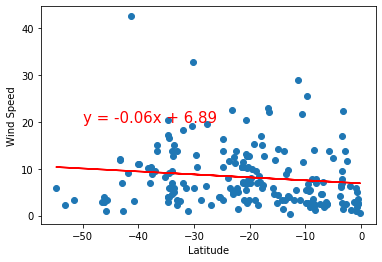